In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas

file_path = "universal_top_spotify_songs.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "asaniczka/top-spotify-songs-in-73-countries-daily-updated",
  file_path,
)

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Arthur\AppData\Local\Temp\ipykernel_14160\131758281.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 431M/431M [02:05<00:00, 3.61MB/s] 


# Quais são as instâncias?

In [ ]:
df

# Features

In [3]:
for feature in (df.columns.tolist()):
    print(feature)

spotify_id
name
artists
daily_rank
daily_movement
weekly_movement
country
snapshot_date
popularity
is_explicit
duration_ms
album_name
album_release_date
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
time_signature


# Class Ratio

In [8]:
for col in df.select_dtypes(exclude='number').columns:
    print(f'-----------------------------')
    print(df[col].value_counts())


-----------------------------
spotify_id
6dOtVTDdiauQNBQEDOtlAB    14630
2plbrEY59IikOBgBGLjaoe    12096
17phhZDn6oGtzMe56NuWvj    11201
3xkHsmpQCBMytMJNiDf3Ii     9703
7bywjHOc0wSjGGbj04XbVi     8522
                          ...  
6hrH0mb1qQsd4VRxssKa6p        1
0oEggQXxzb1U5oCTUQK1GB        1
6b56cSwwp8JXDQiZ4dXkBf        1
3uWDhz3cIoWzN1944cUmq6        1
4dkAVeT8SCueEWoKK3Q2R0        1
Name: count, Length: 22394, dtype: int64
-----------------------------
name
BIRDS OF A FEATHER    14630
Die With A Smile      13903
Espresso              12663
Beautiful Things      12519
Lose Control          11201
                      ...  
Suicide                   1
trenger min love          1
Te văd în trecut          1
Me Usa                    1
Idiota                    1
Name: count, Length: 19618, dtype: int64
-----------------------------
artists
Billie Eilish                    29665
Sabrina Carpenter                27752
Bad Bunny                        25200
KAROL G                    

# 20 Análises Univariativas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Variação de Músicas que mais variaram em relação ao dia anterior
plt.figure(figsize=(12, 6))
plt.hist(df['daily_movement'], bins=range(df['daily_movement'].min(), df['daily_movement'].max() + 1),
         color='skyblue', edgecolor='black', align='left')

plt.title('Frequência de Variações Diárias no Ranking')
plt.xlabel('Variação no Ranking (daily_movement)')
plt.ylabel('Número de Músicas')

plt.grid(True)
plt.tight_layout()
plt.show()

# Contar quantas músicas têm cada valor de variação (diária)
contagem_variacoes = df['daily_movement'].value_counts().sort_index()

# Printar de forma organizada
print("Variação no Ranking | Quantidade de Músicas")
for variacao, qtd in contagem_variacoes.items():
    print(f"{variacao} | {qtd}")

In [ ]:
# Variação de Músicas que mais variaram em relação a semana anterior
plt.figure(figsize=(12, 6))
plt.hist(df['weekly_movement'], bins=range(df['weekly_movement'].min(), df['weekly_movement'].max() + 1), 
         color='skyblue', edgecolor='black', align='left')

plt.title('Frequência de Variações Diárias no Ranking')
plt.xlabel('Variação no Ranking (weekly_movement)')
plt.ylabel('Número de Músicas')

plt.grid(True)
plt.tight_layout()
plt.show()

# Contar quantas músicas têm cada valor de variação (semanal)
contagem_variacoes = df['weekly_movement'].value_counts().sort_index()

# Printar de forma organizada
print("Variação no Ranking | Quantidade de Músicas")
for variacao, qtd in contagem_variacoes.items():
    print(f"{variacao} | {qtd}")


In [ ]:
# Dados dos 25 países com mais músicas
top_countries = df['country'].value_counts(dropna=True).head(25)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue', edgecolor='black')

plt.yscale('log')  # Escala logarítmica

plt.title('Top 25 Países com Mais Músicas no Top 50 (Escala Log)', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Músicas (log)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Países com mais músicas.
print("\n Países com mais músicas:")
print(df['country'].value_counts(dropna=True).head(25))

In [ ]:
# Distribuição de músicas com e sem vocais.
print("\n Distribuição de músicas com e sem vocais:")
df['vocals'] = df['instrumentalness'].apply(lambda x: 'Instrumental' if x > 0.5 else 'Com vocais')
print(df['vocals'].value_counts())

# Contando quantas músicas em cada categoria
vocals_count = df['vocals'].value_counts()

# Criando o gráfico
plt.figure(figsize=(6, 5))
vocals_count.plot(kind='bar', color=['mediumseagreen', 'mediumpurple'], edgecolor='black')

# Títulos e rótulos
plt.title('Distribuição de Músicas com e sem Vocais', fontsize=14)
plt.xlabel('Tipo de Música', fontsize=12)
plt.ylabel('Número de Músicas', fontsize=12)
plt.xticks(rotation=0)

# Adiciona os valores nas barras
for i, value in enumerate(vocals_count):
    plt.text(i, value + value * 0.01, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\Arthur\AppData\Local\Temp\ipykernel_14160\62456341.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="viridis")


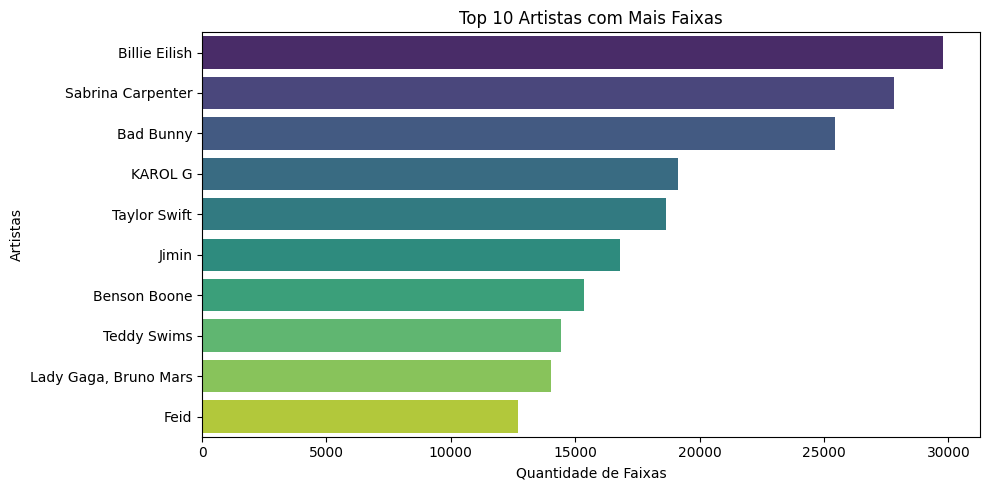

In [3]:
# ---------------------------
# 1. ARTISTS - Top 10 artistas mais frequentes
# ---------------------------
top_artists = df['artists'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="viridis")
plt.title("Top 10 Artistas com Mais Faixas")
plt.xlabel("Quantidade de Faixas")
plt.ylabel("Artistas")
plt.tight_layout()
plt.show()

In [ ]:
# ---------------------------
# 2. IS_EXPLICIT - Gráfico de pizza com proporção
# ---------------------------
explicit_counts = df['is_explicit'].value_counts()
labels = ['Não Explícitas', 'Explícitas']
colors = ['#66b3ff','#ff6666']

plt.figure(figsize=(6,6))
plt.pie(explicit_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Proporção de Músicas Explícitas")
plt.tight_layout()
plt.show()


In [ ]:
# ---------------------------
# Histograma do tamanho dos nomes das músicas
# ---------------------------

# Garantir que todos os nomes sejam tratados como string
df['name_length'] = df['name'].apply(lambda x: len(str(x)))

# Calcular a média
avg_name_length = df['name_length'].mean()

# Histograma
plt.figure(figsize=(10, 5))
sns.histplot(df['name_length'], bins=30, color="mediumslateblue")

# Linha da média
avg_name_length = df['name_length'].mean()
plt.axvline(avg_name_length, color='red', linestyle='--', linewidth=2, label=f'Média: {avg_name_length:.2f}')

# Ajuste do eixo X
plt.xlim(0, 60)  # Limita visualização
plt.xticks(np.arange(0, 61, 5))  # De 0 a 60, de 5 em 5

# Títulos e legendas
plt.title("Distribuição do Tamanho dos Nomes das Músicas")
plt.xlabel("Número de Caracteres")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# ---------------------------
# 4. ALBUM_NAME - Top 10 álbuns mais populares
# ---------------------------
top_albums = df['album_name'].value_counts().head(10)
print(df['album_name'].value_counts(dropna=True).head(10))

plt.figure(figsize=(10,5))
sns.barplot(x=top_albums.values, y=top_albums.index, palette="magma")
plt.title("Top 10 Álbuns Mais Populares")
plt.xlabel("Quantidade de Faixas")
plt.ylabel("Álbum")
plt.tight_layout()
plt.show()

# 10 Análises Multirate

# 5 Métodos de visualizar os dados